In [198]:
# Description: This program attemps to optomize a user portfolio using the Efficient Frontier

In [199]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [200]:
# Get the crypto symbols/ tickers in the portfolio
# FAANG
assets = ['NEO-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'LINK-USD', 'BNB-USD', 'XLM-USD', 'EOS-USD', 'XMR-USD', 'TRX-USD']

# Assign weights to the crypto.
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# Get the crupto/portfolio starting date
cryptoStartDate = '2017-10-01'

# Get the crypto ending date
today = datetime.today().strftime('%Y-%m-%d')

# Create a dataframe to store the adjusted close price of the crypto
df = pd.DataFrame()

# Store the adjusted close price of the crypto into the df
for crypto in assets:
  df[crypto] = web.DataReader(crypto, data_source='yahoo', start = cryptoStartDate, end = today)['Adj Close']

In [201]:
# Show the df
df

,NEO-USD,ETH-USD,XRP-USD,LTC-USD,LINK-USD,BNB-USD,XLM-USD,EOS-USD,XMR-USD,TRX-USD
Date,,,,,,,,,,
2017-09-30,35.720200,302.337006,0.206532,54.543301,0.436647,1.526530,0.013688,0.707760,93.222000,0.001848
2017-10-01,36.741001,297.475006,0.202676,53.375999,0.356767,1.964670,0.012962,0.654973,91.544197,0.002803
2017-10-02,33.606899,292.463013,0.203318,52.349602,0.345535,1.820700,0.012404,0.631230,92.961197,0.002447
2017-10-03,31.158199,292.657990,0.214774,51.399502,0.397361,1.601480,0.011851,0.601539,90.407097,0.003250
2017-10-04,32.275902,295.863007,0.237016,51.669498,0.406538,1.678490,0.014576,0.606157,91.858902,0.003320
...,...,...,...,...,...,...,...,...,...,...
2020-09-01,20.361774,440.040497,0.276461,58.099648,14.897397,24.690361,0.092650,3.100930,91.081741,0.034451
2020-09-02,17.941967,385.671936,0.246580,47.774113,12.016678,20.619886,0.079447,2.643032,77.981140,0.041192
2020-09-03,19.068296,388.241150,0.255883,50.611977,12.492867,21.056107,0.081452,3.014346,82.348129,0.035620


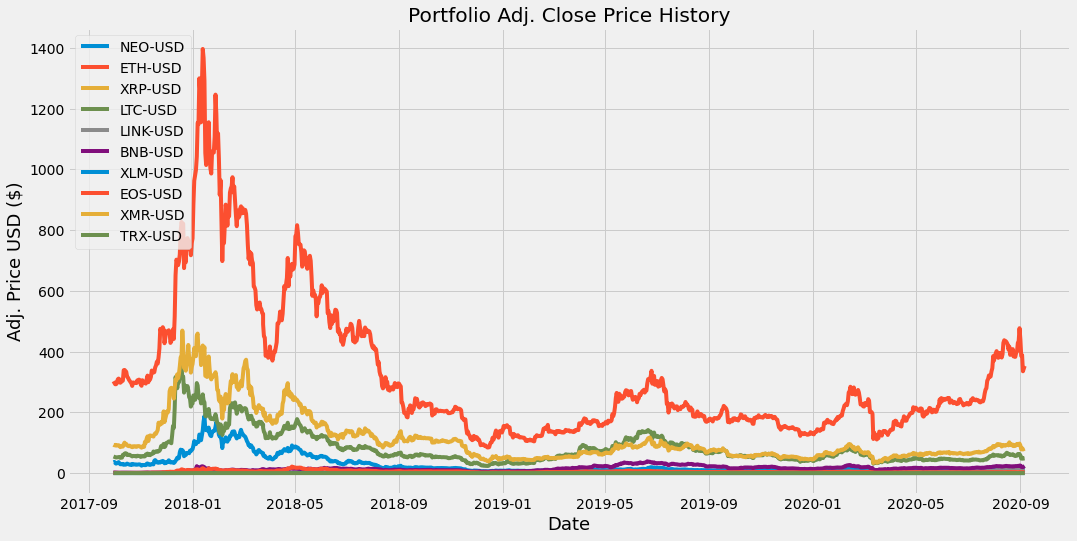

In [150]:
# Visually show the crypto/portfolio
title = 'Portfolio Adj. Close Price History'

# Get the crypto
my_crypto = df

# Create and plot the graph
plt.figure(figsize=(16,8))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show()


In [202]:
pip install PyPortfolioOpt

In [203]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [204]:
# Portfolio Optimization !

# Calculate the expected returns and the annualised sample covariance matrix of assets returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('NEO-USD', 0.0), ('ETH-USD', 0.0), ('XRP-USD', 0.0), ('LTC-USD', 0.0), ('LINK-USD', 0.44709), ('BNB-USD', 0.45514), ('XLM-USD', 0.0), ('EOS-USD', 0.0), ('XMR-USD', 0.0), ('TRX-USD', 0.09777)])
Expected annual return: 104.5%
Annual volatility: 93.0%
Sharpe Ratio: 1.10


(1.0446214359628374, 0.9302909038378162, 1.1013989621266538)

In [205]:
total_portfolio_value = int(input('Input Total value of your portfolio:\n'))
# Get the discrete allocation of each shape per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
# total_portfolio_value 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value )

allocation, leftover = da.lp_portfolio()
print('Descrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))


Input Total value of your portfolio:
1000
Descrete allocation:  {'LINK-USD': 35, 'BNB-USD': 20, 'TRX-USD': 2838}
Funds remaining: $0.01


In [206]:
print('That is mean, that for ' + str(total_portfolio_value) + '$ '+ 'You shoud buy:\n\t')
for key in allocation:
  coin = ''
  for i in key:
    if i == '-':
      break
    coin += i
  print('\t' + str(allocation[key]) + ' ' + coin + ' monets\n\t')
print('\nThe result of this program is no financial advise!')


That is mean, that for 1000$ You shoud buy:
	
	35 LINK monets
	
	20 BNB monets
	
	2838 TRX monets
	

The result of this program is no financial advise!
